# Assignment 6: Train Various Regression Models and Compare Their Performances

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In this assignment you will train and evaluate regression models. Note that just as classification models are called 'classifiers,' regression models are called 'regressors.'

In this assignment, you will:

1. Load the "cell2celltrain" data set.
2. Train and evaluate a linear regression model. 
2. Perform a grid search to identify and fit a cross-validated optimal decision tree regressor. 
3. Fit the optimal decision tree regressor to the training data and make predictions on the test data.
4. Train and evaluate an optimized gradient boosted decision tree and an optimized random forest.
5. Visualize all of the models' performances.

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

## Part 1: Load the Data Set

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed. Run the cell below to load the data set and save it to DataFrame `df`.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [3]:
df = pd.read_csv(filename, header=0)

In [4]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
0,3000002,True,False,False,True,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3000010,True,True,False,False,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000014,False,True,False,False,False,False,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3000022,False,False,False,True,False,False,True,True,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3000026,True,False,False,False,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Part 2: Create Training and Test Data Sets

So far, we mostly focused on classification problems, using the binary 'Churn' column as the class label for prediction. For this exercise, you will focus on a regression problem and predict a continuous outcome.

Your model will predict an individual's income; the label is going to be 'IncomeGroup'.

### Create Labeled Examples 

<b>Task</b>: Create labeled examples from DataFrame `df`. 
In the code cell below carry out the following steps:

* Get the `IncomeGroup` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Get all other columns from DataFrame `df` and assign them to the variable `X`. These will be our features. 

In [5]:
y = df['IncomeGroup'] 
X = df.drop(columns = 'IncomeGroup', axis=1)

### Split Labeled Examples Into Training and Test Sets

<b>Task</b>: In the code cell below create training and test sets out of the labeled examples. 

1. Use scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 30 percent (.30) of the size of the data set.
    * A seed value of '1234'. 
    


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

## Part 3: Fit and Evaluate Two Regression Models: Linear Regression and Decision Tree

### a. Fit and Evaluate a Linear Regression

You will use the scikit-learn `LinearRegression` class to create a linear regression model. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

First let's import `LinearRegression`:

In [7]:
from sklearn.linear_model import LinearRegression

<b>Task</b>: Initialize a scikit-learn `LinearRegression` model object with no arguments, and fit the model to the training data. The model object should be named `lr_model`.

In [8]:
# 1. Create the model object below and assign to variable 'lr_model'
lr_model = LinearRegression()
# 2. Fit the model to the training data below
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>Task:</b> Test your model on the test set (`X_test`). Call the ``predict()`` method  to use the fitted model to generate a vector of predictions on the test set. Save the result to the variable ``y_lr_pred``.

In [9]:
# Make predictions on the test data
y_lr_pred = lr_model.predict(X_test)

To evaluate our linear regression model, we will compute the RMSE (root mean square error) on the test set. RMSE is a metric used to evaluate regression models. RMSE finds the differences between the predicted values and the actual values. 

To compute the RMSE, we will use the scikit-learn ```mean_squared_error()``` function, which computes the MSE between ```y_test``` and ```y_lr_pred```. We will specify the parameter `squared=False` to obtain the RMSE. 

We will also use the coefficient of determination, also known as $R^2$. $R^2$ is a measure of the proportion of variability in the prediction that the model was able to make using the input data. An $R^2$ value of 1 is perfect and 0 implies no explanatory value. We can use scikit-learn's ```r2_score()``` function to compute it. 


<b>Task</b>: In the code cell below, do the following:

1. Call the `mean_squared_error()` function with arguments `y_test` and `y_lr_pred` and the parameter `squared=False` to find the RMSE. Save your result to the variable `lr_rmse`.

2. Call the `r2_score()` function with the arguments `y_test` and `y_lr_pred`.  Save the result to the variable `lr_r2`.

In [10]:
# YOUR CODE HERE
lr_rmse = mean_squared_error(y_test,y_lr_pred, squared=False)
lr_r2 = r2_score(y_test,y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.606739317922426
[LR] R2: 0.6320730521727906


### b. Fit and Evaluate a Decision Tree Using GridSearch

You will use the scikit-learn `DecisionTreeRegressor` class to create a decision tree regressor. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

First let's import `DecisionTreeRegressor`:

In [11]:
from sklearn.tree import DecisionTreeRegressor

#### Set Up a Parameter Grid 

<b>Task</b>: Create a dictionary called `param_grid` that contains possible hyperparameter values for `max_depth` and `min_samples_leaf`. The dictionary should contain the following key/value pairs:

* a key called 'max_depth' with a value which is a list consisting of the integers 4 and 8
* a key called 'min_samples_leaf' with a value which is a list consisting of the integers 25 and 50

In [12]:
param_grid={'max_depth': [4,8], 'min_samples_leaf': [25,50]}

<b>Task:</b> Use `GridSearchCV` to fit a grid of decision tree regressors and search over the different values of hyperparameters `max_depth` and `min_samples_leaf` to find the ones that results in the best 3-fold cross-validation (CV) score.


You will pass the following arguments to `GridSearchCV()`:

1. A decision tree **regressor** model object.
2. The `param_grid` variable.
3. The number of folds (`cv=3`).
4. The scoring method `scoring='neg_root_mean_squared_error'`. Note that `neg_root_mean_squared_error` returns the negative RMSE.


Complete the code in the cell below.

In [13]:
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

dt_regressor = DecisionTreeRegressor()


# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

dt_grid = GridSearchCV(dt_regressor, param_grid, cv = 3, scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train,y_train)


print('Done')


Running Grid Search...
Done


The code cell below prints the RMSE score of the best model using the `best_score_` attribute of the fitted grid search object `dt_grid_search`. Note that specifying a scoring method of `neg_root_mean_squared_error` will result in the negative RMSE, so we will multiply `dt_grid_search.best_score` by -1 to obtain the RMSE.

In [14]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.59


<b>Task</b>: In the code cell below, obtain the best model hyperparameters identified by the grid search and save them to the variable `dt_best_params`.

In [15]:
dt_best_params = dt_grid_search.best_params_
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 50}

<b>Task</b>: In the code cell below, initialize a `DecisionTreeRegressor` model object, supplying the best values of hyperparameters `max_depth` and `min_samples_leaf` as arguments.  Name the model object `dt_model`. Then fit the model `dt_model` to the training data.

In [16]:
# 1. Create the  model object below and assign to variable 'dt_model'
dt_model = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 50)
# 2. Fit the model to the training data below
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<b>Task:</b> Test your model `dt_model` on the test set `X_test`. Call the ``predict()`` method  to use the fitted model to generate a vector of predictions on the test set. Save the result to the variable ``y_dt_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `dt_rmse` and `dt_r2`.

Complete the code in the cell below to accomplish this.

In [17]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
y_dt_pred = dt_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test,y_dt_pred, squared=False)

# 3. Compute the R2 score using r2_score()
dt_r2 = r2_score(y_test,y_dt_pred)


print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.579165465772023
[DT] R2: 0.6647547479695269


## Part 4: Fit and Evaluate Two Regression Ensemble Models

### a. Fit and Evaluate a Gradient Boosted Decision Tree 

You will use the scikit-learn `GradientBoostingRegressor` class to create a gradient boosted decision tree. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

First let's import `GradientBoostingRegressor`:

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

Let's assume you already performed a grid search to find the best model hyperparameters for your gradient boosted decision tree. (We are omitting this step to save computation time.) The best values are: `max_depth=3`, and `n_estimators = 300`. 

<b>Task</b>: Initialize a `GradientBoostingRegressor` model object with the above values as arguments. Save the result to the variable `gbdt_model`. Fit the `gbdt_model` model to the training data.

In [19]:
print('Begin GBDT Implementation...')

# 1. Create the  model object below and assign to variable 'gbdt_model'
gbdt_model = GradientBoostingRegressor(max_depth=3, n_estimators=300)
# 2. Fit the model to the training data below
gbdt_model.fit(X_train, y_train)


print('End')

Begin GBDT Implementation...
End


<b>Task:</b> Use the `predict()` method to test your model `gbdt_model` on the test set `X_test`. Save the result to the variable ``y_gbdt_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `gbdt_rmse` and `gbdt_r2`.

Complete the code in the cell below to accomplish this.

In [20]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
y_gbdt_pred = gbdt_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
gbdt_rmse = mean_squared_error(y_test,y_gbdt_pred, squared=False)

# 3. Compute the R2 score using r2_score()
gbdt_r2 = r2_score(y_test,y_gbdt_pred)


print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.555309306895346
[GBDT] R2: 0.6918038393483544


### b. Fit and Evaluate a Random Forest

You will use the scikit-learn `RandomForestRegressor` class to create a gradient boosted decision tree. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

First let's import `RandomForestRegressor`:

In [21]:
from sklearn.ensemble import RandomForestRegressor

Let's assume you already performed a grid search to find the best model hyperparameters for your random forest model. (We are omitting this step to save computation time.) The best values are: `max_depth=32`, and `n_estimators = 300`. 

<b>Task</b>: Initialize a `RandomForestRegressor` model object with the above values as arguments. Save the result to the variable `rf_model`. Fit the `rf_model` model to the training data.

In [22]:
print('Begin RF Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
# 2. Fit the model to the training data below
rf_model.fit(X_train,y_train)

print('End')

Begin RF Implementation...
End


<b>Task:</b> Use the `predict()` method to test your model `rf_model` on the test set `X_test`. Save the result to the variable ``y_rf_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `rf_rmse` and `rf_r2`.

Complete the code in the cell below to accomplish this.

In [23]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
rf_rmse = mean_squared_error(y_test,y_rf_pred, squared=False)

# 3. Compute the R2 score using r2_score()
rf_r2 = r2_score(y_test,y_rf_pred)
                   
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))    
                   

[RF] Root Mean Squared Error: 0.5600416044660802
[RF] R2: 0.686528615516589


## Part 5: Visualize Model Performance

The code cell below plots the RMSE and R2 score for each regressor.

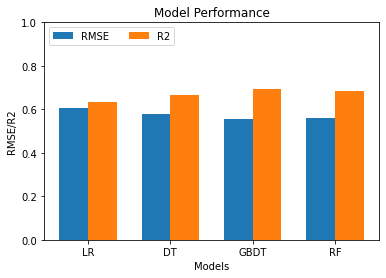

In [24]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['LR', 'DT', 'GBDT', 'RF']

rg= np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


<b>Analysis</b>:  We invite you to analyze the relative performance of the models you trained. Is there a trend to what settings tend to lead to better performance? Would you say that the best model performs well enough for business purposes? How would you try to improve it? Record your findings in the cell below.

The RMSE of the linear regression model is the best compared to all the other models. Our r^2 value was the lowest meaning that we have more accurate predictions from this model. Increasing the parameters for each of the models will be necessary to assess better model performance. 